In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
import os
import suspect
import multiprocessing as mp
plt.rcParams['figure.figsize'] = [10, 7]

In [2]:
os.getcwd()

'/home/orco/data/MacroMols/MRS/MacroMols_7T/code'

## 1. Preprocess Subtracted

In [3]:
# Macromolecule files are the TWIX (.dat) files with ad-special

In [4]:
mm_dats = glob.glob('/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-*/mrs/*ad-special*.dat')
#mm_dats = sorted(mm_dats, key=lambda x: x.split('.')[1].split('_')[-2])
mm_dats

['/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-acc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-acc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat',
 '/

In [5]:
specs = [i.replace('spec-ad-special_TI1-800_TI2-42.dat', 'spec-lr-special.dat') for i in mm_dats]


In [6]:
specs.pop(-5)
specs.pop(-5)
specs += ['/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-701/mrs/sub-701_nuc-1H_loc-pcc_spec-lr-special.dat']

In [7]:
specs

['/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-acc_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-pcc_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-wm_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-wm_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-acc_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-pcc_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-wm_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-pcc_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-acc_spec-lr-special.dat',
 '/home/orco/

In [163]:
mm_dats

['/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-acc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-acc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat',
 '/

In [8]:
[os.path.isfile(i) for i in specs] == [True]*len(specs)

True

In [9]:
# take the 701 and average it
s1 = list()
s1.append(mm_dats.pop(-5))
s1.append(mm_dats.pop(-5))

In [10]:
s1

['/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-701/mrs/sub-701_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42_2.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-701/mrs/sub-701_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42_1.dat']

In [11]:
s11 = [suspect.io.load_twix(i) for i in s1]

/home/orco/anaconda3/envs/mrs/lib/python3.9/site-packages/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 48
  match = re.findall(rgx, header_string)
/home/orco/anaconda3/envs/mrs/lib/python3.9/site-packages/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 34
  match = re.findall(rgx, header_string)
/home/orco/anaconda3/envs/mrs/lib/python3.9/site-packages/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 39
  match = re.findall(rgx, header_string)
/home/orco/anaconda3/envs/mrs/lib/python3.9/site-packages/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 37
  match = re.findall(rgx, header_string)
/home/orco/anaconda3/envs/mrs/lib/python3.9/site-packages/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 38
  match = re.findall(rgx, header_string)
/home/orco/anaconda3/envs/mrs/lib/python3.9/site-packages/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 43
  m

In [12]:
len(s11)

2

In [13]:
s111 = np.append(s11[0], s11[1], axis=0)

In [14]:
s111.shape

(64, 32, 4096)

In [15]:
s111 = s11[0].inherit(s111)

In [16]:
mm_dats += ['/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-701/mrs/sub-701_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat']

In [17]:
water = [i.replace('ad-special_TI1-800_TI2-42.dat','lr-special_water_wOVS.dat') for i in mm_dats]

In [18]:
len(specs) == len(water) == len(mm_dats)

True

In [19]:
mm_dats

['/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-acc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-acc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat',
 '/

## 1.1 Average every two Averages



    Near, Jamie & Harris, Ashley & Juchem, Christoph & Kreis, Roland & Marjańska, Małgorzata & Öz, Gülin & Slotboom, Johannes & Wilson, Martin & Gasparovic, Charles. (2020). Preprocessing, analysis and quantification in single-voxel magnetic resonance spectroscopy: experts' consensus recommendations. NMR in Biomedicine. e4257. 10.1002/nbm.4257.


In [20]:
%%time
mms = [suspect.io.load_twix(i) for i in mm_dats[:-1]]
specs_data = [suspect.io.load_twix(i) for i in specs]

CPU times: user 34.6 s, sys: 1.99 s, total: 36.6 s
Wall time: 37 s


In [21]:
mms += [s111]

In [22]:
len(mms)

14

In [23]:
#[i.shape for i in mms]

In [24]:
waters = [suspect.io.load_twix(i) for i in water]

In [25]:
len(waters) == len(mms) == len(specs_data)

True

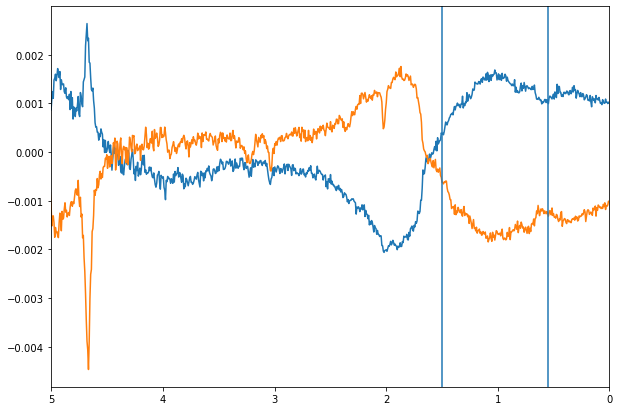

In [26]:
plt.plot(specs_data[0][0,0].frequency_axis_ppm(), specs_data[0][4,0].spectrum().real)
plt.plot(specs_data[0][1,0].frequency_axis_ppm(), specs_data[0][5,0].spectrum().real)
plt.xlim([5,0])
plt.axvline(1.5)
plt.axvline(0.55)

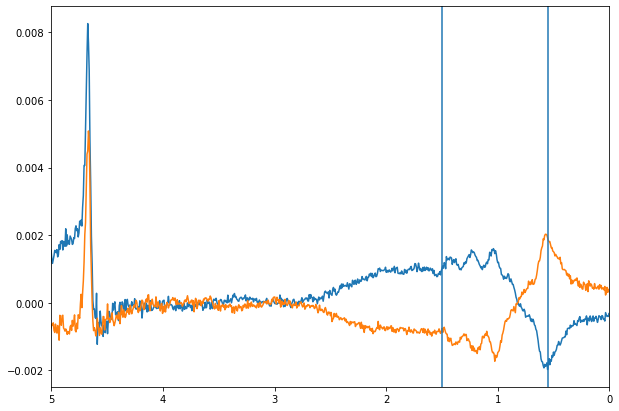

In [27]:
plt.plot(mms[0][0,0].frequency_axis_ppm(), mms[0][4,0].spectrum().real)
plt.plot(mms[0][1,0].frequency_axis_ppm(), mms[0][5,0].spectrum().real)
plt.xlim([5,0])
plt.axvline(1.5)
plt.axvline(0.55)

## 2. Average every odd with every even acquisition

In [28]:
def mean_everytwo(mm1):
    mm1_everytwo = []
    for i in range(0,mm1.shape[0]-1,2):
        mm1_everytwo.append((mm1[i]+mm1[i+1])/2)
    return mm1.inherit(np.array(mm1_everytwo))


In [29]:
def _avg_everytwo(arr):
    return 0.5*(arr[0::2,:, :] + arr[1::2,:, :])

In [30]:
%%time
#avg_everytwo_data = [mean_everytwo(i) for i in mms]
#avg_everytwo_water = [mean_everytwo(i) for i in waters]

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.34 µs


In [31]:
len(mms) == len(waters)

True

In [32]:
%%time
avg_everytwo_data = [_avg_everytwo(i) for i in mms]
avg_everytwo_water = [_avg_everytwo(i) for i in waters]
avg_everytwo_specs = [_avg_everytwo(i) for i in specs_data]

CPU times: user 313 ms, sys: 3.36 s, total: 3.67 s
Wall time: 3.7 s


In [33]:
avg_everytwo_data[0].shape

(32, 32, 4096)

In [34]:
del(mms)
del(waters)

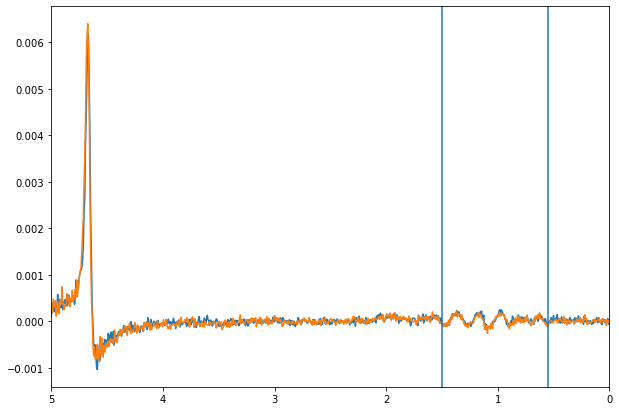

In [35]:
plt.plot(avg_everytwo_specs[0][0,0].frequency_axis_ppm(), avg_everytwo_data[0][4,0].spectrum().real)
plt.plot(avg_everytwo_specs[0][1,0].frequency_axis_ppm(), avg_everytwo_data[0][5,0].spectrum().real)
plt.xlim([5,0])
plt.axvline(1.5)
plt.axvline(0.55)

In [36]:
#[i.shape for i in avg_everytwo]

## 1.2 Coil combination

In [37]:
def coil_combine(mrs):
    coil_combined = []
    for i in range(mrs.shape[0]):
        weights = suspect.processing.channel_combination.svd_weighting(mrs[i,:,:])
        coil_combined.append(suspect.processing.channel_combination.combine_channels(mrs[i,:,:],weights))
    return mrs.inherit(np.array(coil_combined))

In [38]:
#Rodgers, C. T., & Robson, M. D. (2010). Receive array magnetic resonance spectroscopy: Whitened singular value decomposition (WSVD) gives optimal Bayesian solution. Magnetic Resonance in Medicine, 63(4), 881–891
def coil_combine(data, wref, noise_points=None):
    if not noise_points:
        noise_points = int(data.shape[-1]/8)
    noise = data[:,:,-noise_points:]
    noise = np.moveaxis(noise, -2, 0).reshape((32, -1))
    white_data = suspect.processing.channel_combination.whiten(data, noise)
    white_wref = suspect.processing.channel_combination.whiten(wref, noise)
    noise = white_data[:, :, -noise_points:]
    channel_weights = suspect.processing.channel_combination.svd_weighting(np.mean(white_wref, axis=0))
    cc_data = suspect.processing.channel_combination.combine_channels(white_data, channel_weights)
    cc_wref = suspect.processing.channel_combination.combine_channels(white_wref, channel_weights)
    return cc_data, cc_wref

In [39]:
len(avg_everytwo_data)

14

In [40]:
len(avg_everytwo_water)

14

In [41]:
%%time
cc_data = list()
cc_wref = list()
cc_specs = list()
for n in range(len(avg_everytwo_data)):
    print(n)
    d,w = coil_combine(avg_everytwo_data[n],avg_everytwo_water[n],500)
    s,w = coil_combine(avg_everytwo_specs[n],avg_everytwo_water[n],500)
    cc_data.append(d)
    cc_specs.append(s)
    cc_wref.append(w)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
CPU times: user 1min 20s, sys: 41 s, total: 2min 1s
Wall time: 3.84 s


In [42]:
cc_data[0].shape

(32, 4096)

In [43]:
#cc_data = [coil_combine(i) for i in avg_everytwo]

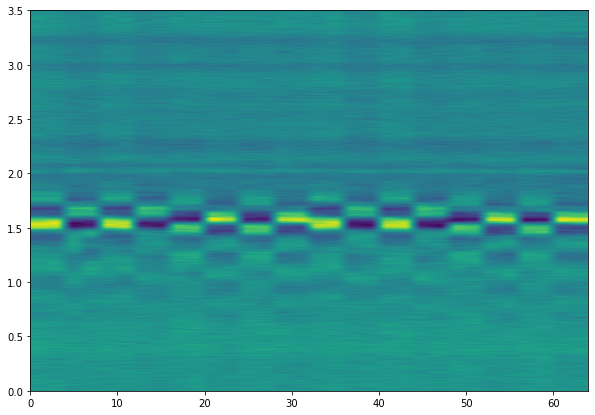

In [44]:
spectra = cc_data[2].spectrum()
frequency_slice = spectra.slice_ppm(3.5, 0)
plt.imshow(spectra[:, frequency_slice].T.real, extent=[0, 64, 0, 3.5], aspect='auto')

In [45]:
cc_data[2][0].shape

(4096,)

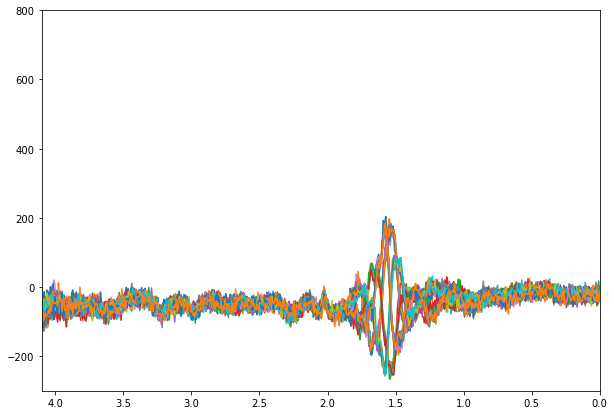

In [46]:
for i in cc_data[2][:]:
    plt.plot(i.frequency_axis_ppm(), i.spectrum().real)
    plt.xlim([4.1,0])
    plt.axvline(4.7)
    plt.ylim([-300,800])

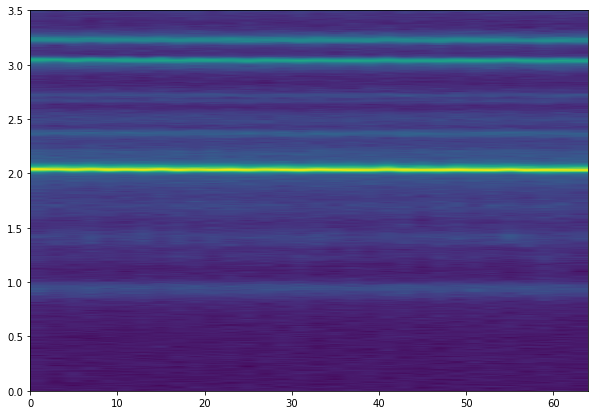

In [47]:
spectra = cc_specs[2].spectrum()
frequency_slice = spectra.slice_ppm(3.5, 0)
plt.imshow(spectra[:, frequency_slice].T.real, extent=[0, 64, 0, 3.5], aspect='auto')

In [48]:
type(cc_data[0])

suspect.mrsobjects.MRSData

In [49]:
[i.shape for i in cc_data]

[(32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096)]

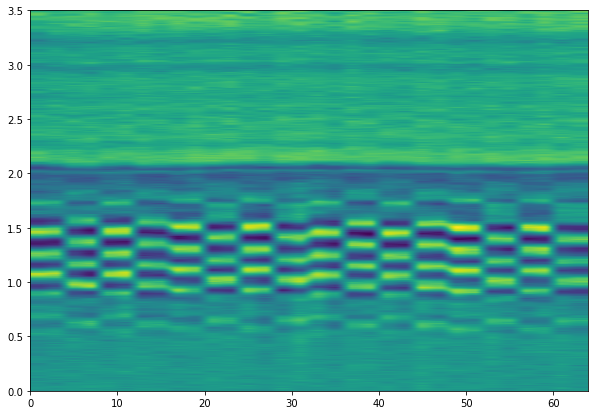

In [50]:
spectra = cc_data[0].spectrum()
frequency_slice = spectra.slice_ppm(3.5, 0)
plt.imshow(spectra[:, frequency_slice].T.real, extent=[0, 64, 0, 3.5], aspect='auto')

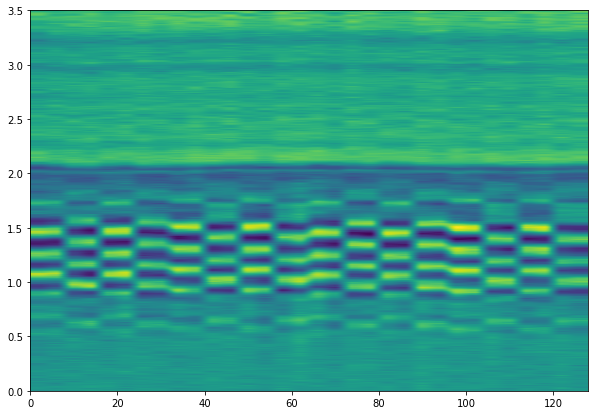

In [51]:
spectra = cc_data[0].spectrum()
frequency_slice = spectra.slice_ppm(3.5, 0)
plt.imshow(spectra[:, frequency_slice].T.real, extent=[0, 128, 0, 3.5], aspect='auto')

## 1.3 Frequency correction

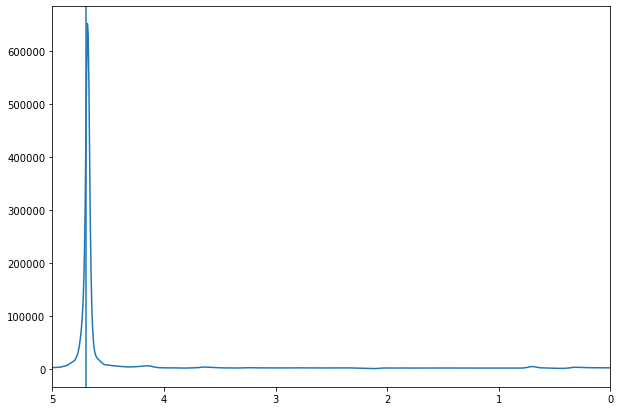

In [52]:
first = cc_wref[1][0]
plt.plot(first.frequency_axis_ppm(), first.spectrum().real)
plt.xlim([5,0])
plt.axvline(4.7)

In [53]:
corr = suspect.processing.frequency_correction.residual_water_alignment(first)

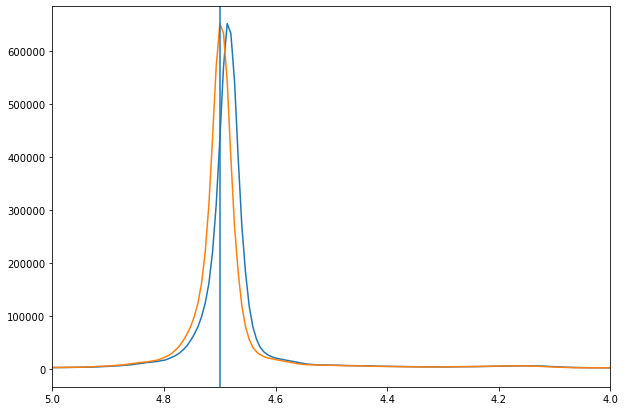

In [54]:
plt.plot(first.frequency_axis_ppm(), first.adjust_frequency(0).spectrum().real)
plt.plot(first.frequency_axis_ppm(), first.adjust_frequency(-corr).spectrum().real)
plt.xlim([5,4])
plt.axvline(4.7)

In [55]:
first = first.adjust_frequency(-corr)
corr

3.90625

In [56]:
w_freq_corr  = [suspect.processing.frequency_correction.correct_frequency_and_phase(i,first) for i in cc_wref]

(-300.0, 800.0)

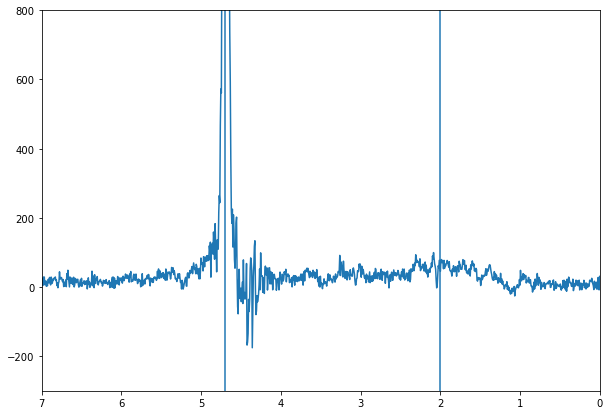

In [57]:
first = cc_data[6][30]
plt.plot(first.frequency_axis_ppm(), first.adjust_phase(-3.5).adjust_frequency(15).spectrum().real)
plt.xlim([7,0])
plt.axvline(4.7)
plt.axvline(2.0)
plt.ylim([-300,800])

In [58]:
first = first.adjust_phase(-3.5).adjust_frequency(15)

In [59]:
#corr = suspect.processing.frequency_correction.residual_water_alignment(first)
#first = first.adjust_frequency(-corr)
#corr

## 1.4 Coregister to first

In [60]:
cc_data[0].shape

(32, 4096)

In [61]:
[i.shape for i in cc_data]

[(32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096),
 (32, 4096)]

In [62]:
cc_data2 = cc_data.copy()

In [63]:
allcc = np.asarray([np.array(i.spectrum().real) for i in cc_data2])

In [64]:
allcc.shape

(14, 32, 4096)

In [65]:
freq_corr2 = [suspect.processing.frequency_correction.correct_frequency_and_phase(i,first) for i in cc_data]

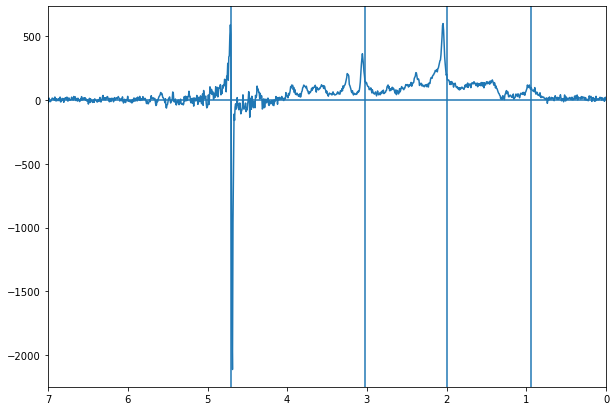

In [66]:
first = cc_specs[9][7]
plt.plot(first.frequency_axis_ppm(), first.adjust_phase(0,).adjust_frequency(0).spectrum().real)
plt.xlim([7,0])
plt.axvline(1.99)
plt.axvline(4.7)
plt.axvline(3.027)
plt.axvline(0.94)
plt.axhline(0)

In [67]:
first = first.adjust_frequency(8)

In [68]:
freq_corr_spec = [suspect.processing.frequency_correction.correct_frequency_and_phase(i,i[0]) for i in cc_specs]

/home/orco/anaconda3/envs/mrs/lib/python3.9/site-packages/scipy/optimize/minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


In [69]:
# Average Water

In [70]:
w_avg = [np.mean(i,axis=0) for i in w_freq_corr]

## 1.5 Average

In [71]:
%%time
averaged_mm = [np.mean(i,axis=0) for i in freq_corr2]
averaged_spec = [np.mean(i,axis=0) for i in freq_corr_spec]

CPU times: user 6.93 ms, sys: 0 ns, total: 6.93 ms
Wall time: 6.28 ms


In [72]:
# ECC

In [73]:
avg_ecc_mm = list()
for n in range(len(averaged_mm)):
    eddy_current = np.unwrap(np.angle(w_avg[n]))
    ec_smooth = suspect.processing.denoising.sliding_gaussian(eddy_current, 32)
    ecc = np.exp(-1j * ec_smooth)
    ec_data = averaged_mm[n] * ecc
    avg_ecc_mm.append(ec_data)

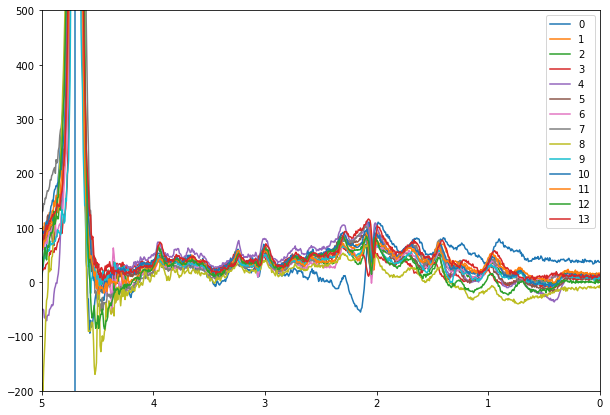

In [74]:
for n,i in enumerate(averaged_mm):
    #plt.plot(i.frequency_axis_ppm(), i.spectrum().real, label=n)
    plt.plot(i.frequency_axis_ppm(), avg_ecc_mm[n].spectrum().real, label=n)
plt.xlim([5,0])
plt.ylim([-200,500])

#plt.ylim([-2e-4,5e-4])
plt.axvline(4.7)
plt.legend()

In [75]:
len(averaged_mm)

14

In [76]:
avg_ecc_spec = list()
for n in range(len(averaged_spec)):
    eddy_current = np.unwrap(np.angle(w_avg[n]))
    ec_smooth = suspect.processing.denoising.sliding_gaussian(eddy_current, 32)
    ecc = np.exp(-1j * ec_smooth)
    ec_data = averaged_spec[n] * ecc
    avg_ecc_spec.append(ec_data)

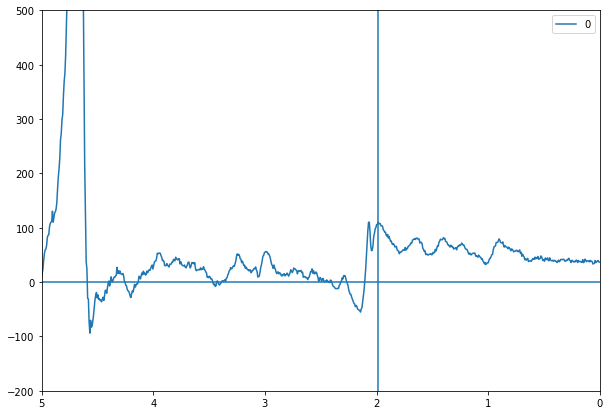

In [77]:
for n,i in enumerate(avg_ecc_mm[0:1]):
    plt.plot(i.frequency_axis_ppm(), i.spectrum().real, label=n)
plt.xlim([5,0])
plt.ylim([-200,500])
plt.axvline(1.99)
plt.legend()
plt.axhline(0)

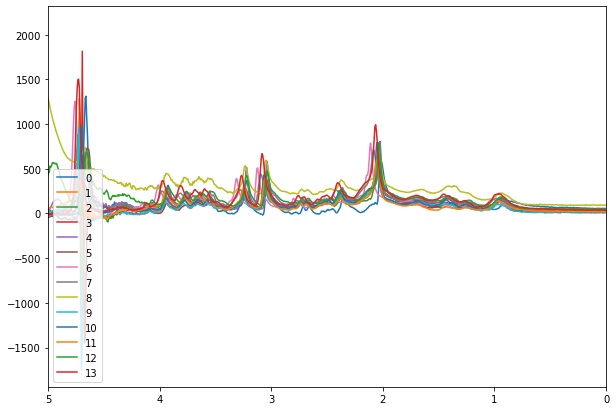

In [78]:
for n,i in enumerate(avg_ecc_spec):
    plt.plot(i.frequency_axis_ppm(), i.spectrum().real, label=n)
plt.xlim([5,0])
#plt.ylim([-200,500])
#plt.axvline(1.99)
plt.legend()
#plt.axhline(0)

In [79]:
avg_ecc_mm.pop(0)
avg_ecc_spec.pop(0)

MRSData([ 3.01131562e+01+1.27714953e+01j,  2.48686481e+01+2.23285847e+01j,
          1.02327600e+01+2.23365411e+01j, ...,
          7.35615665e-03-3.29486030e-02j,  2.61458861e-02-8.30033521e-03j,
         -1.80340529e-02+1.17298191e-02j])

In [80]:
specs.pop(0)

'/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-acc_spec-lr-special.dat'

In [158]:
len(avg_ecc_mm)

13

In [159]:
len(avg_ecc_spec)

13

In [160]:
len(specs)

13

In [162]:
len(dry_list_mm)

13

# HLSVD

In [83]:
water_list_mm = list()
dry_list_mm = list()
for spec in avg_ecc_mm:
    components = suspect.processing.water_suppression.hsvd(spec, 30)
    water_components = [component for component in components if component["frequency"] < 60]
    water_fid = spec.inherit(suspect.processing.water_suppression.construct_fid(water_components, spec.time_axis()))
    dry_fid = spec - water_fid
    water_list_mm.append(water_fid)
    dry_list_mm.append(dry_fid)

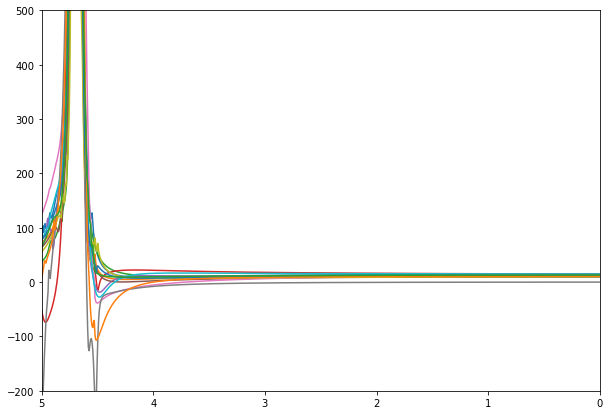

In [84]:
for i in water_list_mm:
    plt.plot(i.frequency_axis_ppm(), 
             i.spectrum().real)
    plt.xlim([5,0])
    plt.ylim([-200,500])
    #plt.axvline(4.7)

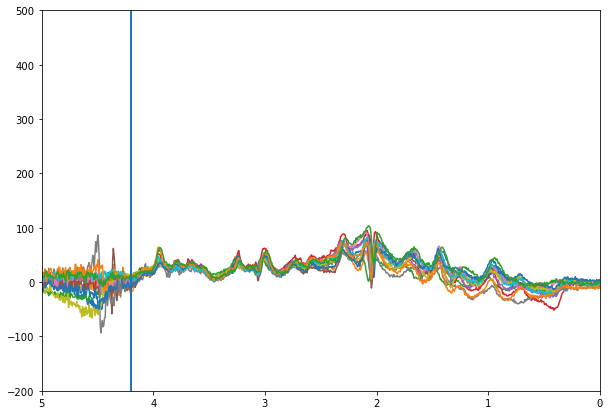

In [85]:
for i in dry_list_mm:
    plt.plot(i.frequency_axis_ppm(), 
             i.spectrum().real)
    plt.xlim([5,0])
    plt.ylim([-200,500])
    plt.axvline(4.2)

In [86]:
water_list_spec = list()
dry_list_spec = list()
for spec in avg_ecc_spec:
    components = suspect.processing.water_suppression.hsvd(spec, 30)
    water_components = [component for component in components if component["frequency"] < 60]
    water_fid = spec.inherit(suspect.processing.water_suppression.construct_fid(water_components, spec.time_axis()))
    dry_fid = spec - water_fid
    water_list_spec.append(water_fid)
    dry_list_spec.append(dry_fid)

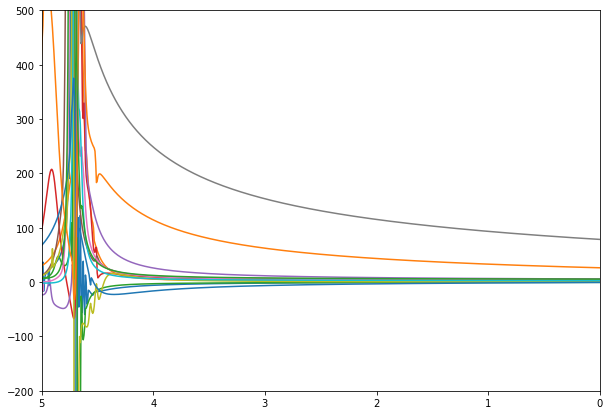

In [87]:
for i in water_list_spec:
    plt.plot(i.frequency_axis_ppm(), 
             i.spectrum().real)
    plt.xlim([5,0])
    plt.ylim([-200,500])
    #plt.axvline(4.7)

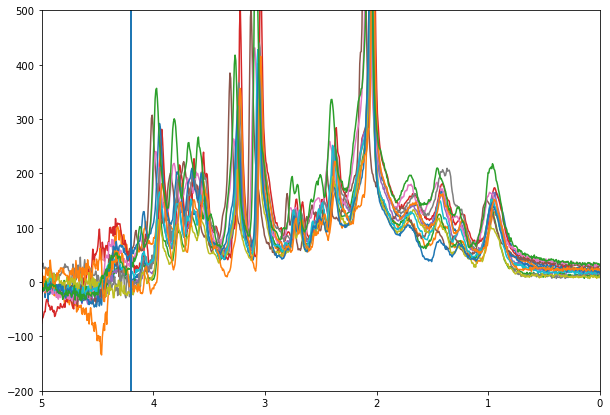

In [88]:
for i in dry_list_spec:
    plt.plot(i.frequency_axis_ppm(), 
             i.spectrum().real)
    plt.xlim([5,0])
    plt.ylim([-200,500])
    plt.axvline(4.2)

In [89]:
len(dry_list_mm) == len(dry_list_spec)

True

In [90]:
der_path = '/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/suspect_preprocessing'

# HLSVD removing NAAG for MM and subtraction

In [469]:
i=13
spec = dry_list_mm[i]
components = suspect.processing.water_suppression.hsvd(spec, 45)

IndexError: list index out of range

In [450]:
fids = [spec.inherit(suspect.processing.water_suppression.construct_fid([i], spec.time_axis())) for i in components]

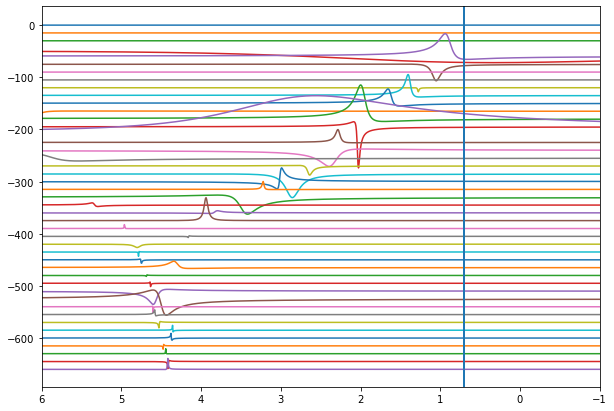

In [451]:
shift = 15
for n,i in enumerate(fids):
    plt.plot(i.frequency_axis_ppm(), i.spectrum().real-n*shift)
    plt.xlim([6,-1])
    #plt.ylim([-200,700])
    #plt.axvline(4.2)
    #plt.axvline(3.94)
    #plt.axvline(0.7)
    plt.axvline(0.7)
    #plt.axhline(0)

In [452]:
artifacts = [components[13]] #+ [components[8]] #+ [components[8]] + components[16:]
artifacts = spec.inherit(suspect.processing.water_suppression.construct_fid(artifacts, spec.time_axis()))

In [453]:
#mm_fid = components[2:8] + components[9:17]
#mm_fid = dry_list_mm[i].inherit(suspect.processing.water_suppression.construct_fid(mm_fid, spec.time_axis()))

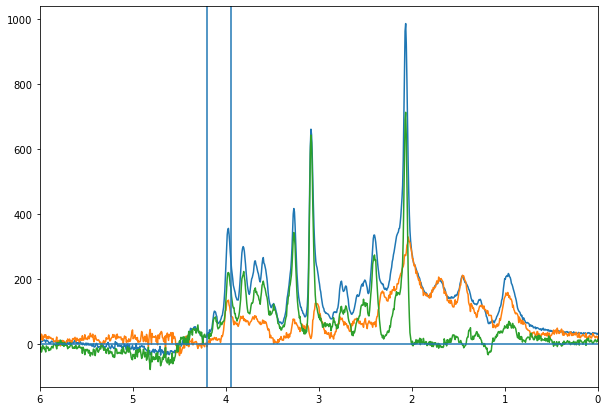

In [466]:
i=12
mul_fact = 2.6
ph=0.4
fr = -14
plt.plot(dry_list_spec[i].frequency_axis_ppm(), dry_list_spec[i].spectrum().real)
plt.plot(dry_list_mm[i].frequency_axis_ppm(), ((dry_list_mm[i]-artifacts)*mul_fact).adjust_phase(ph).adjust_frequency(fr).spectrum().real)
#plt.plot(dry_list_mm[i].frequency_axis_ppm(), (mm_fid*mul_fact).adjust_phase(ph).adjust_frequency(fr).spectrum().real)
sub = dry_list_spec[i] - ((dry_list_mm[i]-artifacts)*mul_fact).adjust_phase(ph).adjust_frequency(fr)
#sub = dry_list_spec[i] - (mm_fid*mul_fact).adjust_phase(ph).adjust_frequency(fr)
plt.plot(dry_list_mm[i].frequency_axis_ppm(), sub.spectrum().real)
plt.xlim([6,0])
#plt.ylim([-200,700])
plt.axvline(4.2)
plt.axvline(3.94)
#plt.axvline(0.7)
plt.axhline(0)

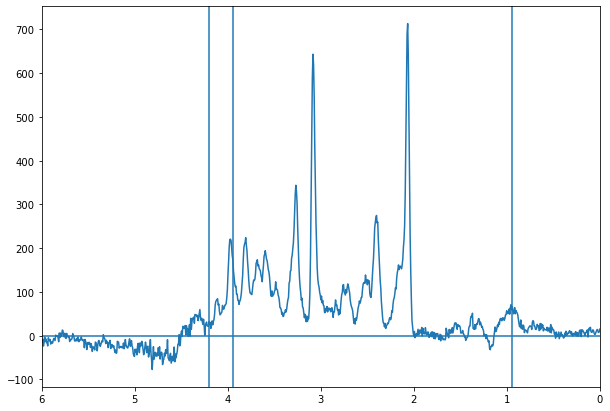

In [467]:
plt.plot(dry_list_mm[i].frequency_axis_ppm(), sub.spectrum().real)
plt.xlim([6,0])
plt.axvline(4.2)
plt.axvline(3.94)
plt.axvline(0.94)
plt.axhline(0)

In [468]:
# Save
dest_name=specs[i].replace('rawdata/', 'derivatives/subtracted/').replace('.dat', '_subtracted.raw')
os.makedirs(os.path.dirname(dest_name), exist_ok=True)
suspect.io.lcmodel.save_raw(dest_name, sub)

'/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-pcc_spec-lr-special.dat'

In [116]:
suspect.io.lcmodel.save_raw

<function suspect.io.lcmodel.save_raw(filename, data)>

In [154]:
specs[i]

'/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-wm_spec-lr-special.dat'

In [155]:
mm_dats[i]

'/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat'

In [156]:
specs

['/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-pcc_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-wm_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-wm_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-acc_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-pcc_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-wm_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-pcc_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-acc_spec-lr-special.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-704/mrs/sub-704_nuc-1H_loc-pcc_spec-lr-special.dat',
 '/home/orco/

In [157]:
mm_dats

['/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-acc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-703/mrs/sub-703_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-acc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-706/mrs/sub-706_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42.dat',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/rawdata/sub-702/mrs/sub-702_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42.dat',
 '/